## L5: Unsupervised Learning Part 1

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression

## First, A few final thoughts on classification uncertainty, metrics, and multiclass problems

Last time we looked at the credit card fraud dataset: a classification problem (Fraud or Not). 

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
cc=pd.read_csv('/content/drive/MyDrive/Data 599/creditcard.csv')

This data set featured:

* Lots of data 
* Serious class imbalance
* Context: Probably FN are worse than FP
* Need for an alternative to accuracy as a metric: f1, recall 

In [7]:
cc.Class.sum()/len(cc)

0.001727485630620034

In [8]:
Xc=cc.drop(['Class','Time'],axis=1)
yc=cc['Class']

In [9]:
Xc_train, Xc_test, yc_train, yc_test = train_test_split(Xc,yc,test_size=0.4, random_state=10)

We built several models on this data:

**LR**

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler=StandardScaler()
Xc_train_scaled=scaler.fit_transform(Xc_train)
Xc_test_scaled=scaler.fit_transform(Xc_test)
lrc=LogisticRegression().fit(Xc_train_scaled,yc_train)

**RF**

In [12]:
rfc=RandomForestClassifier(n_estimators = 150, max_features='sqrt',max_depth=4,random_state=0).fit(Xc_train,yc_train)

Now we might quickly check the f1 scores, but this uses default probability threshold of 0.5. That is, classify an observation as 1 if the algorithm gives a probability of Class 1 that is greater than 0.5. 

Because of the context, we might want to lower this threshold. We might also be able to get better performance with a different threshold.

We can look at this, and compare models across a range of possible thresholds by plotting a P-R curve.

In [13]:
from sklearn.metrics import precision_recall_curve

In [14]:
lr_precision, lr_recall, thresholds = precision_recall_curve(yc_test,lrc.predict_proba(Xc_test_scaled)[:,1])

In [15]:
rf_precision, rf_recall, thresholds = precision_recall_curve(yc_test,rfc.predict_proba(Xc_test)[:,1])

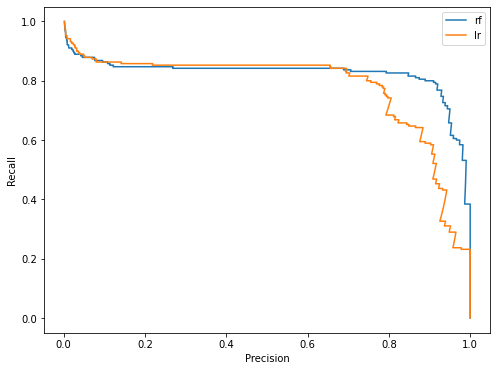

In [16]:
plt.figure(figsize=(8,6))
plt.plot(rf_precision,rf_recall,label='rf')
plt.plot(lr_precision,lr_recall,label='lr')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.legend(loc='best')
plt.show()

This picture seems to indicate that (overall) the random forest classifier might be superior to the logistic regression classifier here: We should be able to achieve a higher Precision with less loss of Recall. We could determine an appropriate threshold value.

It would be interesting to see if a Boosting classifier can improve on our results here at all, but it would be slow: we're bumping up against the size of the data set.

Let's explore thresholding a bit:

In [17]:
from sklearn.datasets import make_moons

In [18]:
np.random.seed(1)
X,y =make_moons(n_samples=200,noise=0.3, random_state=0)
mdf=pd.DataFrame(X,columns=['feat1','feat2'])
mdf['Class']=y
mdf.head()

,feat1,feat2,Class
0,0.694565,0.426664,0
1,1.683530,-0.800166,1
2,-0.250468,0.243922,1
3,-1.133380,-0.611279,0
4,1.769056,-0.310254,1


In [20]:
from matplotlib.colors import ListedColormap
import seaborn as sns

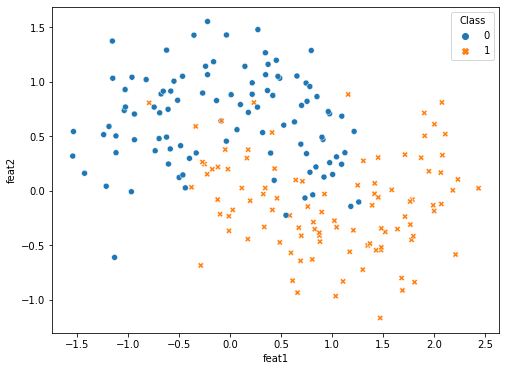

In [21]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='feat1',y='feat2',hue='Class',style='Class',data=mdf)
plt.show()

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

In [23]:
trdf=pd.DataFrame(X_train,columns=['feat1','feat2'])
trdf['Class']=y_train
trdf.head()

,feat1,feat2,Class
0,-0.250468,0.243922,1
1,1.044285,0.310364,0
2,1.262675,-0.103137,0
3,1.108441,-0.830509,1
4,0.469796,1.047966,0


In [24]:
clf=RandomForestClassifier(n_estimators=100,random_state=5).fit(X_train,y_train)

In [25]:
xx, yy = np.meshgrid(np.linspace(-2, 3, 500), np.linspace(-1.5, 2, 500))
X_grid = np.c_[xx.ravel(), yy.ravel()]

In [26]:
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000','#0000FF'])

We've visualized decision boundaries in toy examples with two features. We can also visualzie the model's *prediction confidence* using the ```predict_proba``` functionality which most methods have.

* Black edges = trainging set; 
* White edges = test set. 
* Darker background color = higher probability = higher confidence of prediction. ""

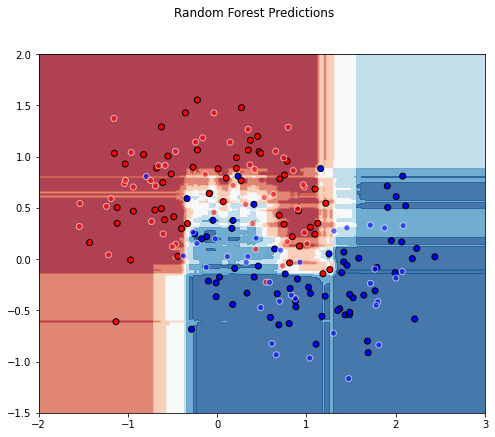

In [27]:
f, ax = plt.subplots(figsize=(8, 6.6))
f.suptitle('Random Forest Predictions')
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,edgecolors='k')
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,edgecolors='w')
plt.show()

Convince yourself that this makes sense: Where is the model most/least confident in it's predictions?

In [ ]:
logreg=LogisticRegression().fit(X_train,y_train)

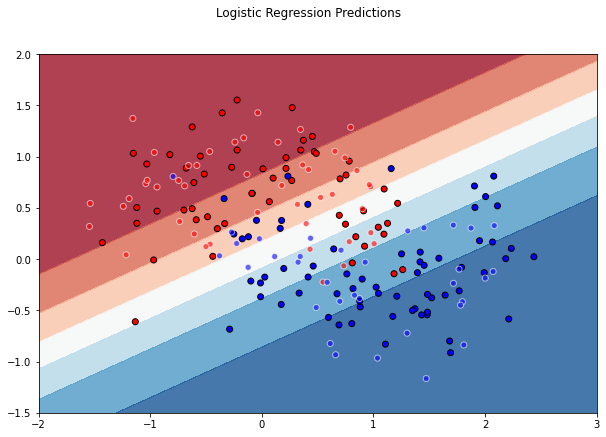

In [ ]:
f, ax = plt.subplots(figsize=(10, 6.6))
f.suptitle("Logistic Regression Predictions")
Z = logreg.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,edgecolors='k')
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,edgecolors='w')

## Recall f1-score (ha ha?)

\\\  | Predicted 0 | Predicted 1
---:|:---:| ---
**Target 0** | $TN$ | $FP$
**Target 1** | $FN$ | $TP$

* $TN$ = True Negative
* $TP$ = True Positive
* $FN$ = False Negative
* $FP$ = False Positive

$$
\text{Accuracy} = \frac{TN+TP}{TN+FN+FP+TP}
$$

### Precision: What fraction of our predicted 1s are actually 1s? 

$$
\text{Precision} = \frac{TP}{TP+FP}
$$

### Recall: What fraction of the actual 1s do we catch?

$$
\text{Recall}=\frac{TP}{TP+FN}
$$

High Precision: Good metric if we want to limit $FP$. If you get an automated notification that you tested +, we don't want to tell a lot of people who don't have the disease that they have it. OR: We work for a pharmaceutical company and we are going to run a clinical trial (experiment). It's expensive! We want to be sure the drug in fact works when we say it works. We want to limit the number of false positives: we say it works but it doesn't. 

High Recall: Good metric if we want to limit $FN$. Example: Disease diagnosis. A $FN$ here mean that we are predicting "No Disease" when, in fact, the disease is present. This has obvious negative consequences for the patient. 

In [28]:
from sklearn.metrics import classification_report
from sklearn.datasets import load_digits

# Multiclass example

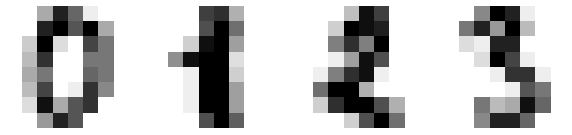

In [29]:
digits = datasets.load_digits()
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image in zip(axes, digits.images):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')

Now we treat this as 10 classes: 0,1,... 9. Like last time, flatten the 8-by-8 pixel grid into column values...

In [30]:
ddf=pd.DataFrame(digits.data,columns=digits.feature_names)
y=pd.DataFrame(digits.target,columns=['Target'])

In [31]:
ddf.shape

(1797, 64)

In [32]:
Xd_train, Xd_test, yd_train, yd_test = train_test_split(ddf,y,random_state=0)

In [33]:
print(Xd_train.shape,Xd_test.shape,yd_train.shape,yd_test.shape)

(1347, 64) (450, 64) (1347, 1) (450, 1)


In [34]:
from sklearn.metrics import f1_score

Here's a very simple (single) depth 4 decision tree:

In [35]:
dclf=DecisionTreeClassifier(max_depth=4,random_state=0).fit(Xd_train,yd_train)

In [36]:
dclf.score(Xd_test,yd_test)

0.5333333333333333

In [37]:
f1_score(yd_test,dclf.predict(Xd_test),average='micro')

0.5333333333333333

Some significant misses (see below) but not bad for a 10 class problem!

In [ ]:
print(classification_report(yd_test['Target'],dclf.predict(Xd_test)))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91        37
           1       0.00      0.00      0.00        43
           2       0.21      0.14      0.17        44
           3       0.20      0.84      0.33        45
           4       0.56      0.92      0.69        38
           5       0.95      0.85      0.90        48
           6       0.96      0.92      0.94        52
           7       0.90      0.54      0.68        48
           8       0.00      0.00      0.00        48
           9       0.92      0.26      0.40        47

    accuracy                           0.53       450
   macro avg       0.56      0.54      0.50       450
weighted avg       0.57      0.53      0.50       450



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Each class has its own f1-score computed by thinking of this class as **positive**.

Some classes do very well, others very poorly. RF should improve a lot...

In [38]:
rdclf=RandomForestClassifier(n_estimators=300,random_state=5).fit(Xd_train,np.ravel(yd_train))

In [39]:
print(classification_report(yd_test['Target'],rdclf.predict(Xd_test)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        37
           1       0.98      0.98      0.98        43
           2       1.00      0.98      0.99        44
           3       0.98      0.98      0.98        45
           4       1.00      0.97      0.99        38
           5       0.96      0.98      0.97        48
           6       1.00      1.00      1.00        52
           7       0.96      1.00      0.98        48
           8       0.98      0.94      0.96        48
           9       0.98      0.98      0.98        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



Much better.

In [40]:
scaler = StandardScaler()
Xd_train_scaled = scaler.fit_transform(Xd_train)
Xd_test_scaled = scaler.fit_transform(Xd_test)

In [41]:
logreg=LogisticRegression().fit(Xd_train_scaled,np.ravel(yd_train))

Logistic Regression also performs well...

In [42]:
print(classification_report(yd_test['Target'],logreg.predict(Xd_test_scaled)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.98      0.94        43
           2       0.98      1.00      0.99        44
           3       1.00      0.98      0.99        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       1.00      0.98      0.99        52
           7       0.98      0.98      0.98        48
           8       0.96      0.92      0.94        48
           9       0.96      0.98      0.97        47

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450



One more example with a (tough) muticlass (5) classification problem... and we'll talk about the averages in the table:

In [43]:
mcX,mcy=datasets.make_classification(n_samples=600, n_features=10, n_informative=4, n_redundant=2, n_repeated=0, n_classes=5, n_clusters_per_class=2, weights=[0.1,.3,.1,.4],flip_y=0.01, class_sep=1.0, hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=0)

In [44]:
Xmc_train, Xmc_test, ymc_train, ymc_test = train_test_split(mcX,mcy,random_state=0,train_size=0.3)

In [45]:
toyXmc=pd.DataFrame(Xmc_train)
toyymc=pd.DataFrame(ymc_train,columns=['Class'])

In [46]:
toyymc.Class.value_counts()

3    83
1    42
0    23
2    20
4    12
Name: Class, dtype: int64

Note we have 5 classes AND considerable class imbalance.

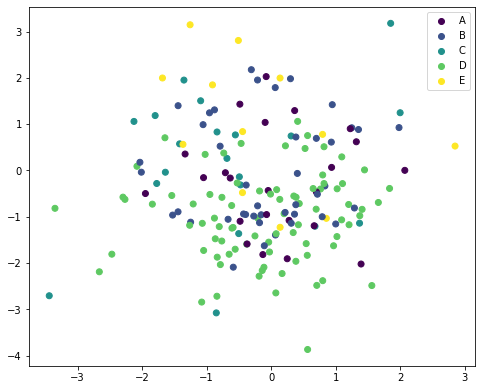

In [47]:
f, ax = plt.subplots(figsize=(8, 6.6))
classes=['A','B','C','D','E']
scatter=ax.scatter(Xmc_train[:,0], Xmc_train[:,1], c=ymc_train)
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.show()

In [48]:
clf=RandomForestClassifier(n_estimators=100,random_state=5).fit(Xmc_train,ymc_train)

In [49]:
print(classification_report(ymc_test,clf.predict(Xmc_test)))

              precision    recall  f1-score   support

           0       0.67      0.40      0.50        40
           1       0.72      0.82      0.77       136
           2       0.63      0.42      0.51        40
           3       0.78      0.94      0.85       158
           4       0.68      0.33      0.44        46

    accuracy                           0.74       420
   macro avg       0.70      0.58      0.61       420
weighted avg       0.72      0.74      0.71       420



In [50]:
f1_score(ymc_test,clf.predict(Xmc_test),average='macro')

0.613926127933808

In [51]:
f1_score(ymc_test,clf.predict(Xmc_test),average='micro')

0.7357142857142858

In [52]:
f1_score(ymc_test,clf.predict(Xmc_test),average='weighted')

0.713887064328889

* **Macro**: Raw average of individual class f1s: treat's all classes as equally important.
* **Weighted**: Avg individual class f1s weighted by support.
* **Micro**: Sum TP, FP, TN, FN for each class and aggregate them to produce an overall f1 (= Accuracy!) 

Still have probabilities so we can get a sense of confidence of predictions:

In [53]:
clf.predict_proba(Xmc_test)[0:10]

array([[0.29, 0.67, 0.03, 0.  , 0.01],
       [0.06, 0.66, 0.  , 0.25, 0.03],
       [0.  , 0.  , 0.04, 0.96, 0.  ],
       [0.06, 0.17, 0.34, 0.16, 0.27],
       [0.2 , 0.34, 0.02, 0.02, 0.42],
       [0.12, 0.79, 0.02, 0.05, 0.02],
       [0.15, 0.33, 0.23, 0.04, 0.25],
       [0.05, 0.67, 0.18, 0.1 , 0.  ],
       [0.16, 0.78, 0.02, 0.01, 0.03],
       [0.18, 0.13, 0.38, 0.18, 0.13]])

## Unsupervised learning

So far we've used features $X$ to predict $y$, be it quantitative (Regression: predict a number) or categorical (Classification: predict a label).

Most methods have a version for each: GradientBoostingRegressor vs. GradientBoostingClassifier, knnRegressor vs. knnClassifier, etc.

Think about an observation -- a row in our data frame. It involves measurements of the $p$ features: $X_1,X_2,\ldots X_p$ and a measurement of the target $Y$. 

Thus, the learning process -- or modeling process-- involves using the true values of $Y$ for a given observations to (attempt to) learn the relationship between $Y$ and the features.

Since the true values of $Y$ are known, we use them to two different ends. 

1. *Learning* the relationship between the features and the target. Here, we are using the known values of $Y$ on the training set.
2. Evaluating our work once we've built a model. Here, we use the known values of $Y$ on the test set to evaluate the how well our model did. We use things like RSS or MSE in regression and accuracy or f1-score in classification.

The known value of $Y$ for an observation is sometimes called a *label*. Supervised learning involves working with labeled data -- data that has a target $Y$. 

In an ***unsupervised learning*** problem, we have no labels. So no target variable $Y$. This creates several problems. In particular...

Our data consists of features $X_1,X_2,\ldots X_p$. We are asking the algorithm to find some interesting information in the features without telling it what we're trying to do/find.

Once it's done, we don't have a way (at least not easily) to see how the algorithm did. There's no *ground truth* the measure against (like we usually do using the test set). 

Examples: 
* EDA, here's a dataset, tell me something interesting.
* Dimension reduction: take a high(er) dim dataset and give me a low dimensional representation (maybe for visualization)
* Traditional basketball player positions are outdated... find new ones! (but we don't know what they should be)
* Predict a movie that I will like based on other movies I like.

## Principal Components Analysis

Think of an observation with $p$ features $X_1,X_2\ldots X_p$. You can think of the values of the feature variables as coordinates that locate the observation in feature space. As usual, visualizing is best done in 2 dimensions: 

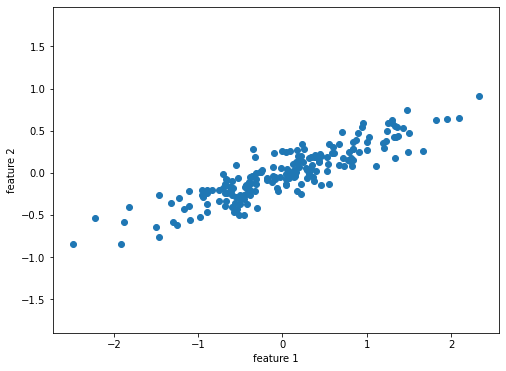

In [ ]:
plt.figure(figsize=(8,6))
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2),rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.axis('equal');
plt.show()

In [ ]:
np.dot(rng.randn(2, 2),(1,1)).T

array([ 1.60013101, -0.33639255])

Build observations in a 2-dim feature space.

PCA finds alternative coordinates for the observations. 
* **The first principal component is the direction where the data exhibits the greatest amount of variability.** 

Why? Well, imagine a feature where most of the observations are pretty close to the mean. 

Then that feature (likely) gives little information about the data. Conversely, large variance in a feature (direction) could mean it contains a lot of information about the data.

In [54]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [55]:
print(pca.components_)

[[-0.9370758   0.34912597]
 [-0.34912597 -0.9370758 ]]


In [ ]:
print(pca.explained_variance_ratio_)

[0.97634101 0.02365899]


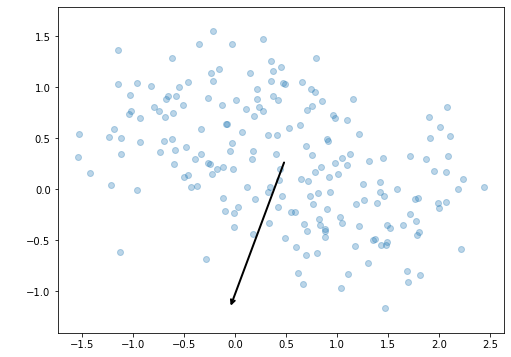

In [56]:
def draw_vector(v0, v1, ax=None):
    ax = plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,color='black',
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');
plt.show()

Principal components are directions so only unique up to sign.

The second principal component is the direction where the data shows the most variability *subject to the condition that this direction is orthogonal (perpendicular) to the first principal compnent*.

Now, if you only wanted to use one feature to describe your data, a good choice might be describing where it lives along the first principal component. Thus, we can project each point onto the first principal component and get it's coordinate in that direction.

Directions to a point P (maybe you remember polar coords?): 
* walk along x, then walk along y... OR
* Walk along PC1 then walk along PC2


In [57]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


Plot each point (blue) in the original feature space and its projection (orange) onto the first PC.

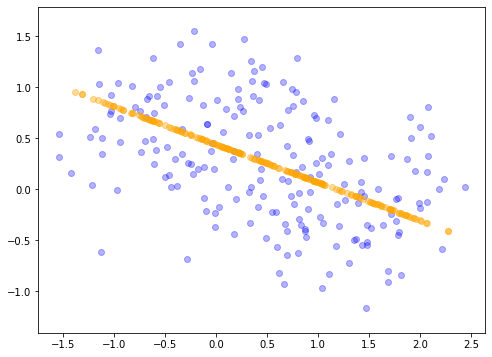

In [58]:
plt.figure(figsize=(8,6))
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.3,color='blue')
plt.scatter(X_new[:, 0], X_new[:, 1], color='orange',alpha=0.4)
plt.axis('equal');
plt.show()

If we had 2 features we probably wouldn't want to reduce the dimension down to 1. But if we had lots of dimensions, and we suspect that not all are particularly informative, then we might indeed be interested in expressing the data in a lower dimensional way. More on this later!

In this way, PCA can be useful for performing dimensionality reduction.

For example... in the digits data set every observation has 64 features. We could project it onto the first 2 principal components and try to visualize it.

In [ ]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


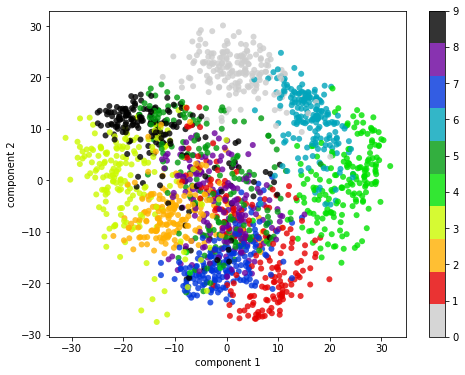

In [ ]:
fig,ax=plt.subplots(figsize=(8,6))
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none',alpha=0.8,
            cmap=plt.cm.get_cmap('nipy_spectral_r', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();
plt.show()

Kind of an interesting visualization. Classes are reasonably, though not completely, separated.

Two PCs with 64 entries in each vector.

Before PCA, a digit image is a 64 dimensional data point: Tell me the intensity of each of the 64 pixels.

In [59]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [60]:
p2=np.zeros_like(digits.data[0])
p2[2]=digits.data[0][2]
p3=np.zeros_like(digits.data[0])
p3[3]=digits.data[0][3]
p4=np.zeros_like(digits.data[0])
p4[4]=digits.data[0][4]

In [61]:
p3.reshape(8,8)

array([[ 0.,  0.,  0., 13.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

This is like representing a point as 
$$
(x,y,z) = x(1,0,0)+y(0,1,0)+z(0,0,1)
$$

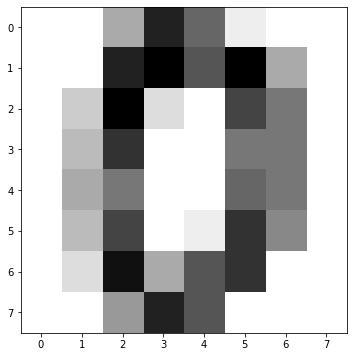

In [62]:
fig, axes = plt.subplots(figsize=(8, 6))
plt.imshow(digits.data[0].reshape(8,8),cmap=plt.cm.gray_r)
plt.show()

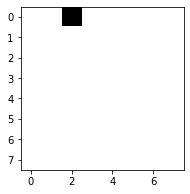

In [63]:
fig, axes = plt.subplots(figsize=(5, 3))
plt.imshow(p2.reshape(8,8),cmap=plt.cm.gray_r)

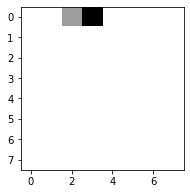

In [64]:
fig, axes = plt.subplots(figsize=(5, 3))
plt.imshow((p2+p3).reshape(8,8),cmap=plt.cm.gray_r)

In [65]:
p2+p3

array([ 0.,  0.,  5., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

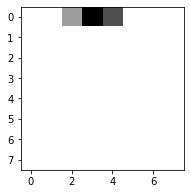

In [66]:
fig, axes = plt.subplots(figsize=(5, 3))
plt.imshow((p2+p3+p4).reshape(8,8),cmap=plt.cm.gray_r)

In [67]:
pca5 = PCA(5).fit(digits.data)
coords5=pca5.transform(digits.data)
#projected = pca.fit_transform(digits.data)
print(coords5.shape)

(1797, 5)


Now, an image can be approximated by giving it's 5 coordinates along the first 5 principal components:
$$
c_1\cdot(PC1)+c_2\cdot(PC2)+c_3\cdot(PC3)+c_4\cdot(PC4)+c_5\cdot(PC5)
$$

The $c_i$'s are:

In [68]:
coords5[0]

array([-1.2594665 , 21.2748835 , -9.46305455, 13.01418866, -7.12871494])

The $PC_i$s are vectors (with 64 components... a direction in 64-space)

In [69]:
print(pca5.components_.shape,pca5.components_[0].shape)

(5, 64) (64,)


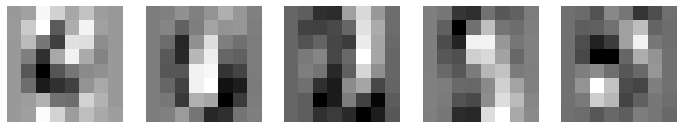

In [70]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(12, 12))
for ax, image in zip(axes, pca5.components_):
    ax.set_axis_off()
    ax.imshow(image.reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')

Instead of building images out of individual pizels, we build them out of these principal directions or principal components.

Note: This highlights one of the drawbacks of PCA: explain the meaning of PC1 in the context of digits!

The data is automatically centered (all feartures are tansformed to have mean 0) so we need to add back the mean

In [71]:
dmean=digits.data.mean(axis=0)

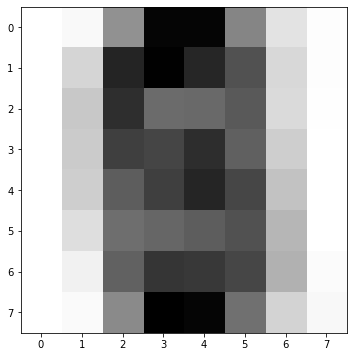

In [72]:
fig, axes = plt.subplots(figsize=(8, 6))
plt.imshow(dmean.reshape(8,8),cmap=plt.cm.gray_r)
plt.show()

We can reconstruct a (dimension reduced) image as follows: 

In [73]:
reconstruct=dmean+coords5[0][0]*pca5.components_[0]+coords5[0][1]*pca5.components_[1]+coords5[0][2]*pca5.components_[2]+coords5[0][3]*pca5.components_[3]+coords5[0][4]*pca5.components_[4]

In [74]:
true_img=digits.data[0]
comparison=[reconstruct,true_img]

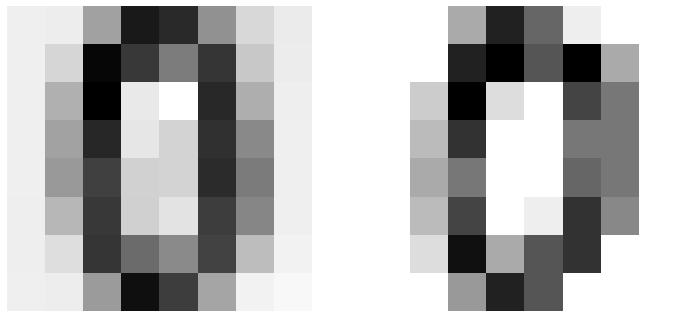

In [75]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 12))
for ax, image in zip(axes, comparison):
    ax.set_axis_off()
    ax.imshow(image.reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')

Note don't need to do this by hand: ```inverse_transform``` does this automatically

In [76]:
pca5 = PCA(5).fit(digits.data)
projected = pca5.fit_transform(digits.data)

In [77]:
images5=pca5.inverse_transform(projected)

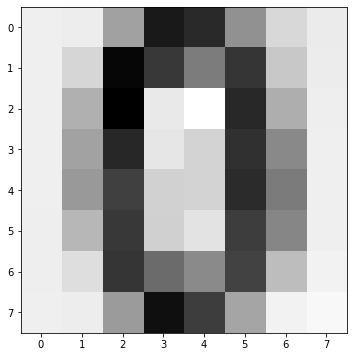

In [78]:
fig, axes = plt.subplots(figsize=(8, 6))
plt.imshow(images5[0].reshape(8,8),cmap=plt.cm.gray_r)
plt.show()

#### How many principal componients do we need/want?

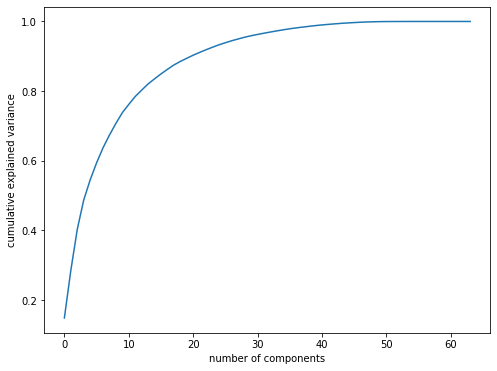

In [79]:
pca=PCA().fit(digits.data)
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

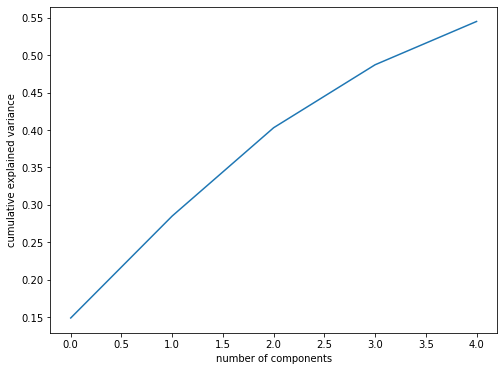

In [80]:
#pca=PCA().fit(digits.data)
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca5.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

### Another example:

In [95]:
usa=pd.read_csv('/content/drive/MyDrive/Data 599/USA_Arrests.csv')
usa.head(50)

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


* Crimes per 100,000
* Urban Pop = % of state population living in urban area.

In [83]:
Xcrime=usa.drop('State',axis=1)
ycrime=usa['State']

We need to scale the data BEFORE doing PCA. ```sklearn```'s PCA automatically mean-centers... here we are also standardizing the variance due to extreme differences:

In [84]:
print(Xcrime.mean(), '\n', Xcrime.var())

Murder        7.788
Assault     170.760
UrbanPop     65.540
Rape         21.232
dtype: float64 
 Murder        18.970465
Assault     6945.165714
UrbanPop     209.518776
Rape          87.729159
dtype: float64


In [85]:
Xcrime_scaled=StandardScaler().fit_transform(Xcrime)

In [86]:
Xcrime_scaled.shape

(50, 4)

In [87]:
pca = PCA(2).fit_transform(Xcrime_scaled)

In [88]:
temp=PCA(2).fit(Xcrime_scaled)

Note... fit_transform throws out the actual components which we might want to look at.

In [89]:
temp.components_

array([[ 0.53589947,  0.58318363,  0.27819087,  0.54343209],
       [ 0.41818087,  0.1879856 , -0.87280619, -0.16731864]])

In [90]:
Xcrime.columns

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

What do these PCs mean/represent? 
* Hard to interpret! (PCs jumble up the variables)
* PC1: high crime and high-ish Urban Pop
* PC2: Low Urban Pop, some crime 

But, can visualizable now (in two diumensions). Each state has 2 coordinates in the first 2 PCs:

In [91]:
pca.shape

(50, 2)

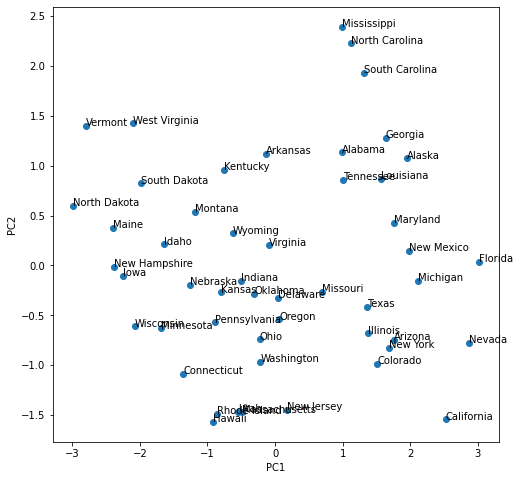

In [92]:
fig, ax = plt.subplots(figsize=(8,8))
xx=pca[:,0]
yy=pca[:,1]
ax.scatter(xx,yy)
plt.xlabel('PC1')
plt.ylabel('PC2')
for i,txt in enumerate(ycrime):
    ax.annotate(txt, (xx[i], yy[i]))
plt.show()    

Can play around with PCs using built-in faces data set.

In [98]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=20)
print(faces.target_names)
print(faces.images.shape)

['Alejandro Toledo' 'Alvaro Uribe' 'Amelie Mauresmo' 'Andre Agassi'
 'Angelina Jolie' 'Ariel Sharon' 'Arnold Schwarzenegger'
 'Atal Bihari Vajpayee' 'Bill Clinton' 'Carlos Menem' 'Colin Powell'
 'David Beckham' 'Donald Rumsfeld' 'George Robertson' 'George W Bush'
 'Gerhard Schroeder' 'Gloria Macapagal Arroyo' 'Gray Davis'
 'Guillermo Coria' 'Hamid Karzai' 'Hans Blix' 'Hugo Chavez' 'Igor Ivanov'
 'Jack Straw' 'Jacques Chirac' 'Jean Chretien' 'Jennifer Aniston'
 'Jennifer Capriati' 'Jennifer Lopez' 'Jeremy Greenstock' 'Jiang Zemin'
 'John Ashcroft' 'John Negroponte' 'Jose Maria Aznar'
 'Juan Carlos Ferrero' 'Junichiro Koizumi' 'Kofi Annan' 'Laura Bush'
 'Lindsay Davenport' 'Lleyton Hewitt' 'Luiz Inacio Lula da Silva'
 'Mahmoud Abbas' 'Megawati Sukarnoputri' 'Michael Bloomberg' 'Naomi Watts'
 'Nestor Kirchner' 'Paul Bremer' 'Pete Sampras' 'Recep Tayyip Erdogan'
 'Ricardo Lagos' 'Roh Moo-hyun' 'Rudolph Giuliani' 'Saddam Hussein'
 'Serena Williams' 'Silvio Berlusconi' 'Tiger Woods' 'Tom Das

In [99]:
counts=np.bincount(faces.target)
for i, (count,name) in enumerate(zip(counts,faces.target_names)):
    print(name, count)

Alejandro Toledo 39
Alvaro Uribe 35
Amelie Mauresmo 21
Andre Agassi 36
Angelina Jolie 20
Ariel Sharon 77
Arnold Schwarzenegger 42
Atal Bihari Vajpayee 24
Bill Clinton 29
Carlos Menem 21
Colin Powell 236
David Beckham 31
Donald Rumsfeld 121
George Robertson 22
George W Bush 530
Gerhard Schroeder 109
Gloria Macapagal Arroyo 44
Gray Davis 26
Guillermo Coria 30
Hamid Karzai 22
Hans Blix 39
Hugo Chavez 71
Igor Ivanov 20
Jack Straw 28
Jacques Chirac 52
Jean Chretien 55
Jennifer Aniston 21
Jennifer Capriati 42
Jennifer Lopez 21
Jeremy Greenstock 24
Jiang Zemin 20
John Ashcroft 53
John Negroponte 31
Jose Maria Aznar 23
Juan Carlos Ferrero 28
Junichiro Koizumi 60
Kofi Annan 32
Laura Bush 41
Lindsay Davenport 22
Lleyton Hewitt 41
Luiz Inacio Lula da Silva 48
Mahmoud Abbas 29
Megawati Sukarnoputri 33
Michael Bloomberg 20
Naomi Watts 22
Nestor Kirchner 37
Paul Bremer 20
Pete Sampras 22
Recep Tayyip Erdogan 30
Ricardo Lagos 27
Roh Moo-hyun 32
Rudolph Giuliani 26
Saddam Hussein 23
Serena Williams 52

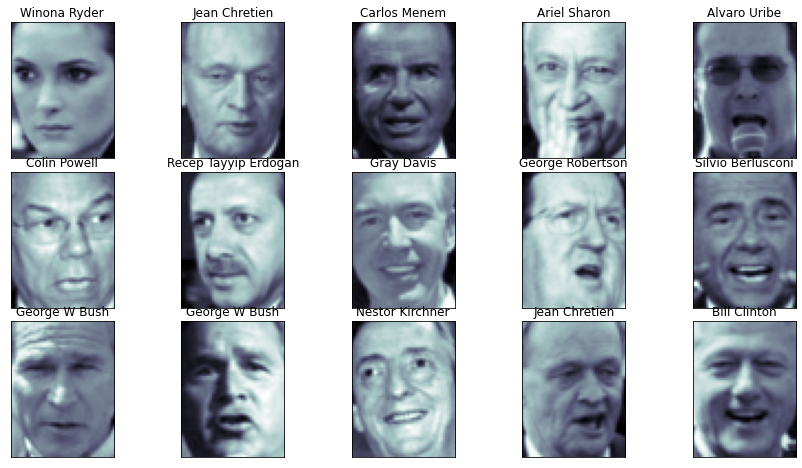

In [100]:
fig, axes = plt.subplots(3, 5, figsize=(15, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for target,image,ax in zip(faces.target,faces.images,axes.ravel()):
    ax.imshow(image,cmap='bone')
    ax.set_title(faces.target_names[target])

In [101]:
print(faces.data.shape,faces.data[0].shape)

(3023, 2914) (2914,)


Let's take these 62*47=2914 dimensional observations and project them down onto the first 150 principal components.

In [102]:
pca = PCA(150)
pca.fit(faces.data)

PCA(n_components=150)

FIrst 24 principal directions:

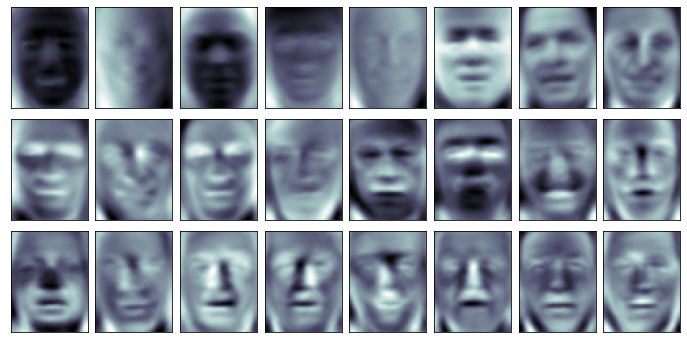

In [103]:
fig, axes = plt.subplots(3, 8, figsize=(12, 6),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

Note: considerable pre-processing needs to be done first... e.g., eye alignment.

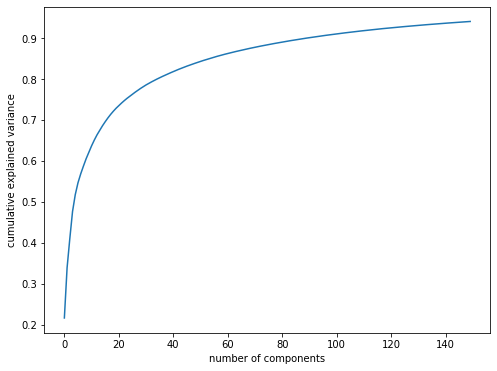

In [104]:
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()

In [105]:
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

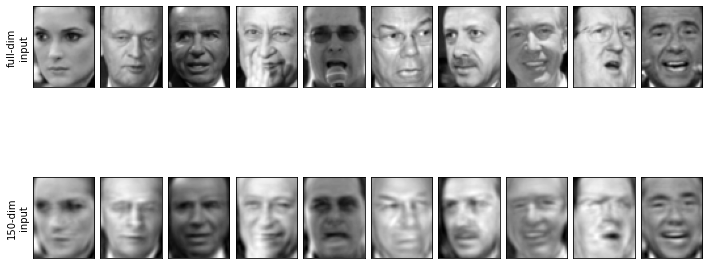

In [106]:
fig, ax = plt.subplots(2, 10, figsize=(12, 6),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')    
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\ninput')
plt.show()

In [108]:
#components = pca.transform(faces.data)
components.shape

(3023, 150)

Each image in it's new 150-dim representation 

Each principal component/direction has 2914 entries (the original pixels).

In [107]:
pca.components_.shape

(150, 2914)

Take the first 50 or fewer faces for each of the 62 faces in the data set.

In [109]:
sub = np.zeros(faces.target.shape,dtype=bool)
for target in np.unique(faces.target):
    sub[np.where(faces.target==target)[0][:50]]=1

In [110]:
X_faces = faces.data[sub]
y_faces=faces.target[sub]

In [111]:
X_faces.shape

(2063, 2914)

Split them into training/test:

In [112]:
Xf_train, Xf_test, yf_train, yf_test = train_test_split(X_faces, y_faces,stratify=y_faces, random_state=0)

Reduce dimensionality witrh PCA:

In [113]:
pca = PCA(100,whiten=True,random_state=0).fit(Xf_train)
X_train_pca=pca.transform(Xf_train)
X_test_pca=pca.transform(Xf_test)

In [114]:
Xf_train.shape

(1547, 2914)

In [115]:
X_train_pca.shape

(1547, 100)

Try to classify faces using knn and the single nearest nbr in 2914 dim space!

In [116]:
from sklearn.neighbors import KNeighborsClassifier

In [117]:
raw_knn = KNeighborsClassifier(n_neighbors=1)
raw_knn.fit(Xf_train, yf_train)

KNeighborsClassifier(n_neighbors=1)

In [118]:
raw_knn.score(Xf_test,yf_test)

0.24031007751937986

Not too bad w/ 62 classes:

In [119]:
1/62

0.016129032258064516

Now repeat in 100 dim space using PCA:

In [120]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, yf_train)

KNeighborsClassifier(n_neighbors=1)

In [121]:
knn.score(X_test_pca, yf_test)

0.3178294573643411

### Another approach to dimension reduction called TSNE

#### Unfortunately this is consistently crashing my notebook now...

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
tsne=TSNE(random_state=5)

In [ ]:
#digits_tsne=tsne.fit_transform(digits.data)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [ ]:
#digits_tsne.shape

(1797, 2)

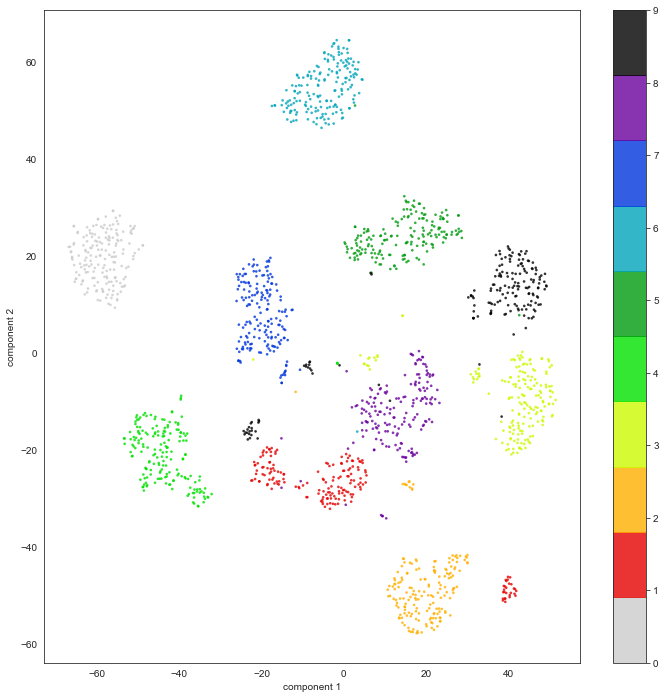

In [ ]:
plt.figure(figsize=(12,12))
plt.scatter(digits_tsne[:, 0], digits_tsne[:, 1],
            c=digits.target, edgecolor='none', s=7,alpha=0.8,
            cmap=plt.cm.get_cmap('nipy_spectral_r', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [ ]:
pca.components_.shape

(100, 2914)

In [ ]:
pca.components_[0].shape

(2914,)

In [ ]:
faces.data[0].shape

(2914,)

# Sandbox

Here are all NBA players from 2022 along with their stats per 100 possessions: ```nba2022_per100poss.csv ```

Try pca on ```nba2022_per100poss.csv``` (or anything else) to find "similar" players.

In [ ]:
nba=pd.read_csv('nba2022_per100poss.csv',encoding = "ISO-8859-1")

In [ ]:
nba.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,TRB,AST,STL,BLK,TOV,PF,PTS,Unnamed: 29,ORtg,DRtg
0,1,Precious Achiuwa\achiupr01,C,22,TOR,73,28,1725,7.7,17.5,...,13.7,2.4,1.1,1.2,2.4,4.4,19.2,NaN,105.0,110
1,2,Steven Adams\adamsst01,C,28,MEM,76,75,1999,5.0,9.2,...,18.2,6.1,1.6,1.4,2.8,3.7,12.6,NaN,125.0,108
2,3,Bam Adebayo\adebaba01,C,24,MIA,56,56,1825,11.1,20.0,...,15.5,5.2,2.2,1.2,4.1,4.7,29.3,NaN,117.0,104
3,4,Santi Aldama\aldamsa01,PF,21,MEM,32,0,360,7.0,17.5,...,11.6,2.8,0.8,1.3,2.1,4.8,17.5,NaN,101.0,111
4,5,LaMarcus Aldridge\aldrila01,C,36,BRK,47,12,1050,11.6,21.1,...,11.9,1.9,0.6,2.2,2.0,3.6,28.0,NaN,119.0,112


In [ ]:
nba.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Unnamed: 29',
       'ORtg', 'DRtg'],
      dtype='object')

In [ ]:
nba['Player'][0].split("\\")

['Precious Achiuwa', 'achiupr01']

In [ ]:
nba.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,TRB,AST,STL,BLK,TOV,PF,PTS,Unnamed: 29,ORtg,DRtg
0,1,Precious Achiuwa\achiupr01,C,22,TOR,73,28,1725,7.7,17.5,...,13.7,2.4,1.1,1.2,2.4,4.4,19.2,NaN,105.0,110
1,2,Steven Adams\adamsst01,C,28,MEM,76,75,1999,5.0,9.2,...,18.2,6.1,1.6,1.4,2.8,3.7,12.6,NaN,125.0,108
2,3,Bam Adebayo\adebaba01,C,24,MIA,56,56,1825,11.1,20.0,...,15.5,5.2,2.2,1.2,4.1,4.7,29.3,NaN,117.0,104
3,4,Santi Aldama\aldamsa01,PF,21,MEM,32,0,360,7.0,17.5,...,11.6,2.8,0.8,1.3,2.1,4.8,17.5,NaN,101.0,111
4,5,LaMarcus Aldridge\aldrila01,C,36,BRK,47,12,1050,11.6,21.1,...,11.9,1.9,0.6,2.2,2.0,3.6,28.0,NaN,119.0,112
